In [0]:
import torch
import numpy as np
import matplotlib.pyplot as plt

#00. Create Linear Function : $y$ =  $a$$x$ + $b$  

In [0]:
#when y = ax + b
#if a = 3 and b = 2
def linearLine(t1, t2, x):
  return t1 * x + t2
#x is range from 0 to 10
x = torch.arange(0, 10, 0.1)
#y_hat = 3x + 2
y_hat = linearLine(3, 2, x)

#01. Input data
##Create dots (Using Gausian Random) $y$^ = $y$ + n
(n is Gausian Random)



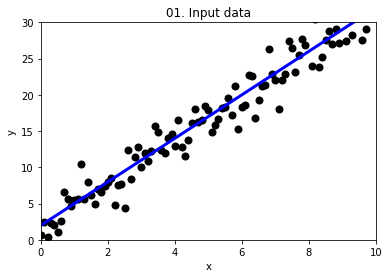

In [122]:
#Create Random dots respect to the line1 : linear function
def create_Rand(x, y):
  #randn function : gausion random
  #coefficient of randn function : standard deviation
  #if standard deviation is bigger : "dots spread"
  return y + 2 * torch.randn(y.size())

y = create_Rand(x, y_hat)
#line1 : Linear Function
line1 = plt.plot(x, y_hat)
#dots : Random dots repect to line1
dots = plt.scatter(x, y)

plt.setp(line1, color = 'b', linewidth = 3.0)
plt.setp(dots, color = 'k', linewidth = 2.0)
plt.axis([0,10,0,30])
plt.xlabel("x")
plt.ylabel("y")
plt.title("01. Input data")
plt.show()

#02. Output Results
##Using Gradient Descent, get Cost & hypothesis from random dots
when hypothesis is $y$ = $\theta$$_0$$x$ + $\theta$$_1$ : \\

$J(\theta)$ = ${1 \over\ 2m}$$\Sigma$$_{i=1}^{m}$($h$$_\theta$($x^{(i)}$)-$y^{(i)}$)$^2$ \\

$\theta$$_0$$^{(t+1)}$ := $\theta$$_0$$^{t}$ - $\alpha$${1 \over\ m}$$\Sigma$$_{i=1}^{m}$($h$$_\theta$($x^{(i)}$)-$y^{(i)}$) \\

$\theta$$_1$$^{(t+1)}$ := $\theta$$_1$$^{t}$ - $\alpha$${1 \over\ m}$$\Sigma$$_{i=1}^{m}$($h$$_\theta$($x^{(i)}$)-$y^{(i)}$)$x^{(i)}$


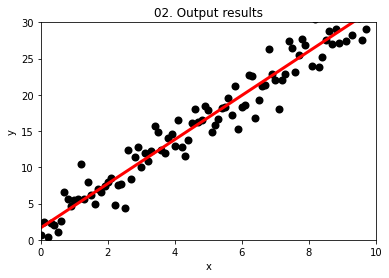

In [123]:
#iniitalize theta0, theta1
t0 = 0.0
t1 = 0.0

#num of data
m = x.size()[0]

#step_size
#if step size 'a' is a little bit bigger : Find faster
#if step size 'a' is very bigger : cost increase continuously
#if step size 'a' is a smaller : Find slowly
a = 0.02

#The new line that is repected to the random dots
def hypothesis(t0, t1, x):
    return t0 * x + t1

#Lists that put data from loops
t0_list = []
t1_list = []
cost_list = []

#Set enough loops
for i in range(5000):
    h = hypothesis(t0, t1, x) - y
    #Gradient Descent
    #Cost Function
    cost = torch.mean(h ** 2) * m / 2
    #Theta 0
    t0 = t0 - a * torch.mean(h * x)
    #Theta 1
    t1 = t1 - a * torch.mean(h)
    
    #put the data into the lists
    cost_list.append(cost)
    t0_list.append(t0)
    t1_list.append(t1)
    

#dots : Random dots repect to line1    
dots = plt.scatter(x, y)
#line2 : solution from dots obtained linear Regression
line2 = plt.plot(x, hypothesis(t0, t1, x))

plt.setp(dots, color = 'k', linewidth = 2.0)
plt.setp(line2, color = 'r', linewidth = 3.0)
plt.axis([0,10,0,30])
plt.xlabel("x")
plt.ylabel("y")
plt.title("02. Output results")
plt.show()

#03. Plotting the energy values($J(\theta)$)


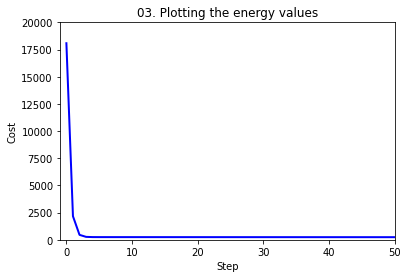

In [124]:
#cost_line : set of Cost that can watch changes of Cost
cost_line = plt.plot(cost_list)
plt.setp(cost_line, color = 'b', linewidth = 2.0)
plt.axis([-1, 50, 0, 20000])
plt.xlabel("Step")
plt.ylabel("Cost")
plt.title("03. Plotting the energy values")
plt.show()

#04. Plotting the model parameters($\theta_0 ,\theta_1$)

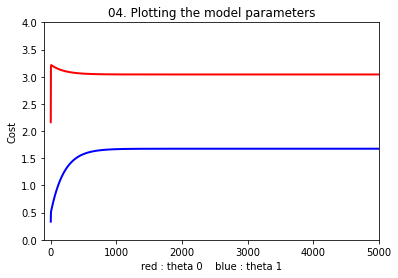

In [125]:
#t0_line : set of Theta 0 that can watch changes of Theta 0
t0_line = plt.plot(t0_list)
#t1_line : set of Theta 1 that can watch changes of Theta 1
t1_line = plt.plot(t1_list)

plt.setp(t0_line, color = 'r', linewidth = 2.0)
plt.setp(t1_line, color = 'b', linewidth = 2.0)
plt.axis([-100, 5000, 0, 4])
plt.ylabel("Cost")
plt.xlabel("red : theta 0    blue : theta 1")
plt.title("04. Plotting the model parameters")
plt.show()